In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from scipy import stats
import warnings
warnings.filterwarnings("ignore")


### <center> Configuraciones

In [2]:
plt.style.use('ggplot')
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 4)
plt.rcParams['font.size'] = 12

### <center> Carga de data

In [3]:
df = pd.read_csv('/Users/n.arcos89/Documents/GitHub/Proyecto-Habitos-estudiantes/Data/student_habits_performance.csv')

In [4]:
df.head(2)

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0


In [5]:
#comprobamos la extensión del dataset
df.shape

(1000, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

In [7]:
df.isnull().sum()/len(df) * 100

student_id                       0.0
age                              0.0
gender                           0.0
study_hours_per_day              0.0
social_media_hours               0.0
netflix_hours                    0.0
part_time_job                    0.0
attendance_percentage            0.0
sleep_hours                      0.0
diet_quality                     0.0
exercise_frequency               0.0
parental_education_level         9.1
internet_quality                 0.0
mental_health_rating             0.0
extracurricular_participation    0.0
exam_score                       0.0
dtype: float64

In [8]:
#Comprobar las opciones de cada variable objeto para conocer mejor los datos. 

df['internet_quality'].unique()

array(['Average', 'Poor', 'Good'], dtype=object)

In [9]:
#también se puede hacer con .value_counts

df['diet_quality'].value_counts()

diet_quality
Fair    437
Good    378
Poor    185
Name: count, dtype: int64

In [10]:
#Generar una funcion que selecciones las columnas que son objeto y nos devuelva los varlores unicos que tiene cada uno de ellas. Así unificamos los códigos anteriores y tenemos una visión global. 

def unique_values(df, cols):
    for col in cols:
        if df[col].dtype == 'object':  
            print(f"Unique values in {col}:")
            print(df[col].unique())
            print("\n")

# No usamos la primera columna porque es el id del estudiante y no tiene sentido ver los valores únicos de esa columna
unique_values(df, df.columns[1:])

Unique values in gender:
['Female' 'Male' 'Other']


Unique values in part_time_job:
['No' 'Yes']


Unique values in diet_quality:
['Fair' 'Good' 'Poor']


Unique values in parental_education_level:
['Master' 'High School' 'Bachelor' nan]


Unique values in internet_quality:
['Average' 'Poor' 'Good']


Unique values in extracurricular_participation:
['Yes' 'No']




In [11]:
#Cambiamos los valores nan a sin datos en parental_education_level
df['parental_education_level'].fillna('Sin datos', inplace=True)

In [12]:
#Comprobamos que no hay valores nulos
df.isnull().sum()/len(df) * 100

student_id                       0.0
age                              0.0
gender                           0.0
study_hours_per_day              0.0
social_media_hours               0.0
netflix_hours                    0.0
part_time_job                    0.0
attendance_percentage            0.0
sleep_hours                      0.0
diet_quality                     0.0
exercise_frequency               0.0
parental_education_level         0.0
internet_quality                 0.0
mental_health_rating             0.0
extracurricular_participation    0.0
exam_score                       0.0
dtype: float64

In [13]:
#comprobamos que no hay duplicados
df.duplicated().sum()

np.int64(0)

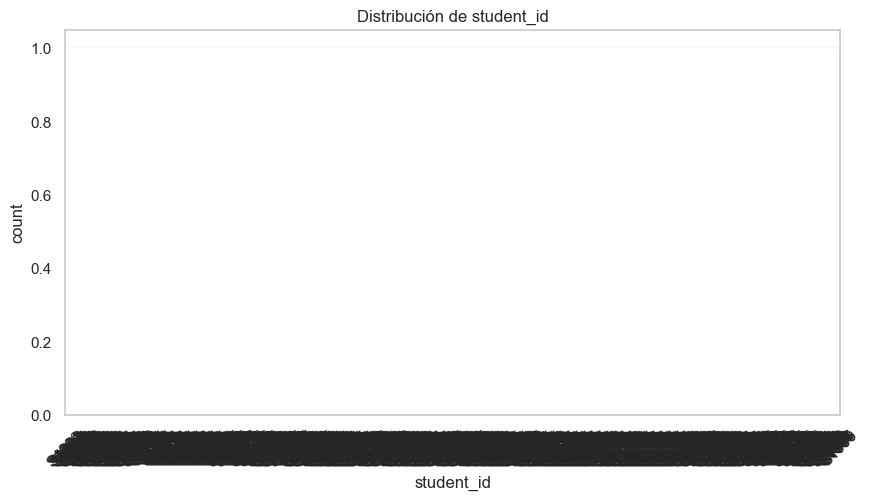

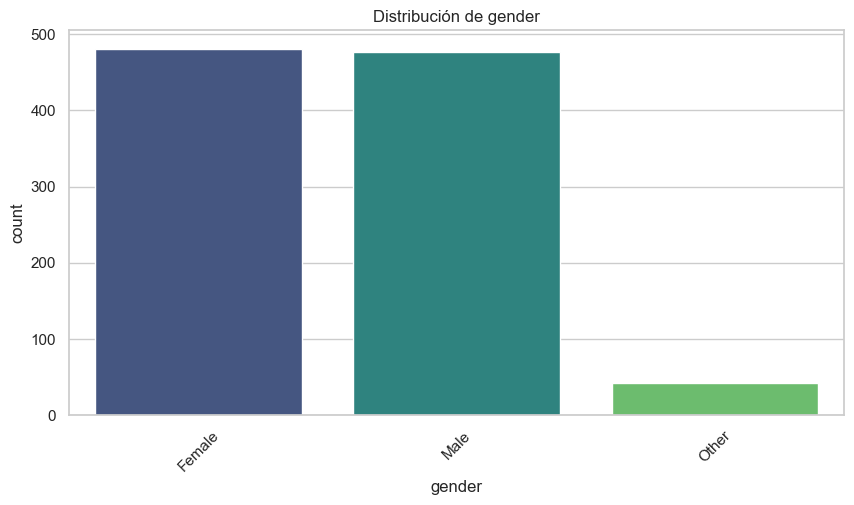

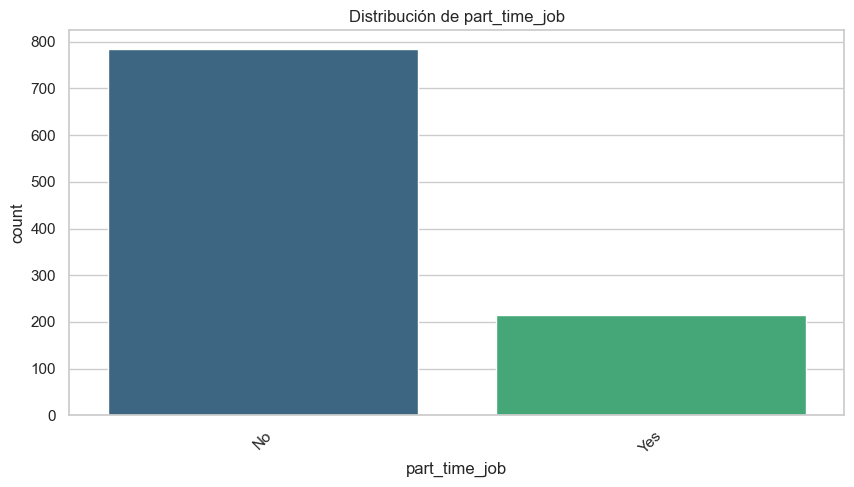

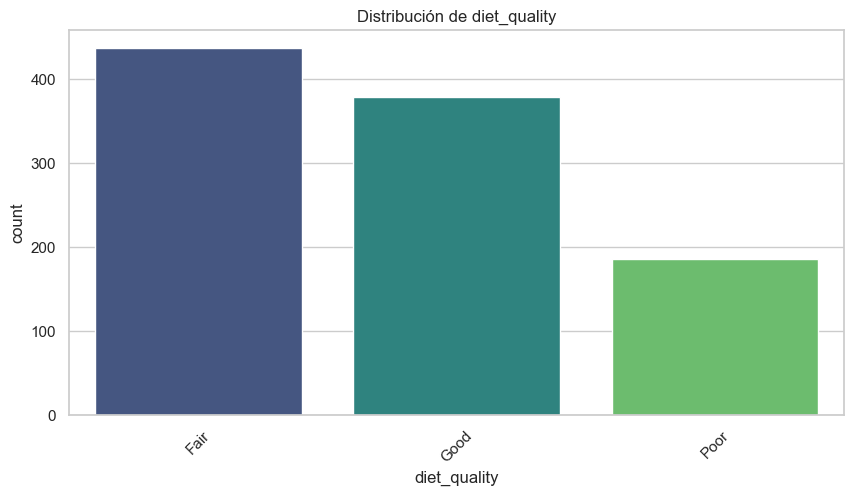

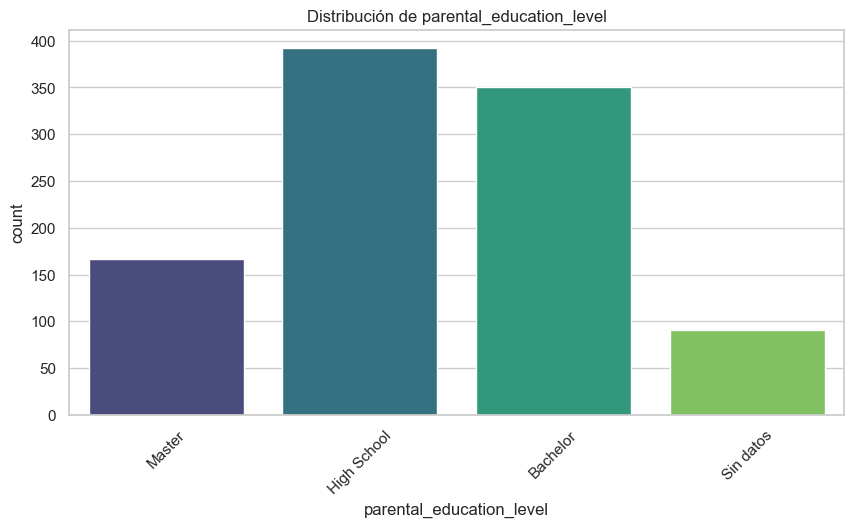

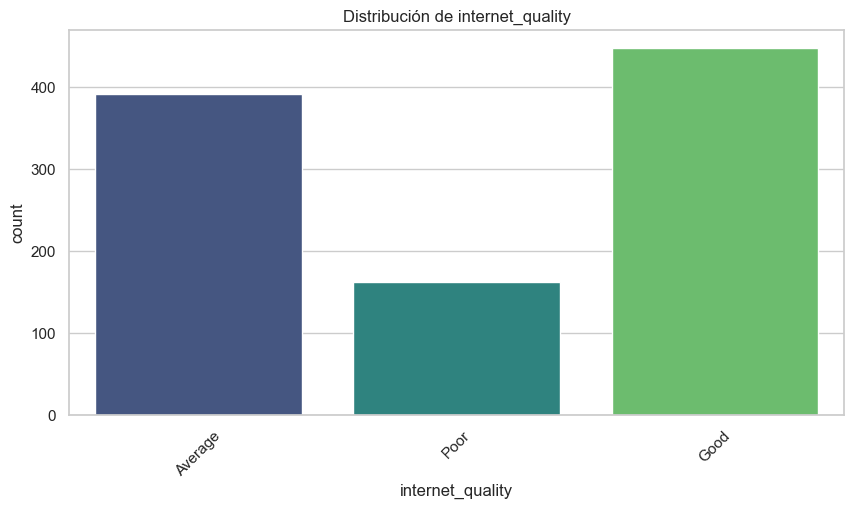

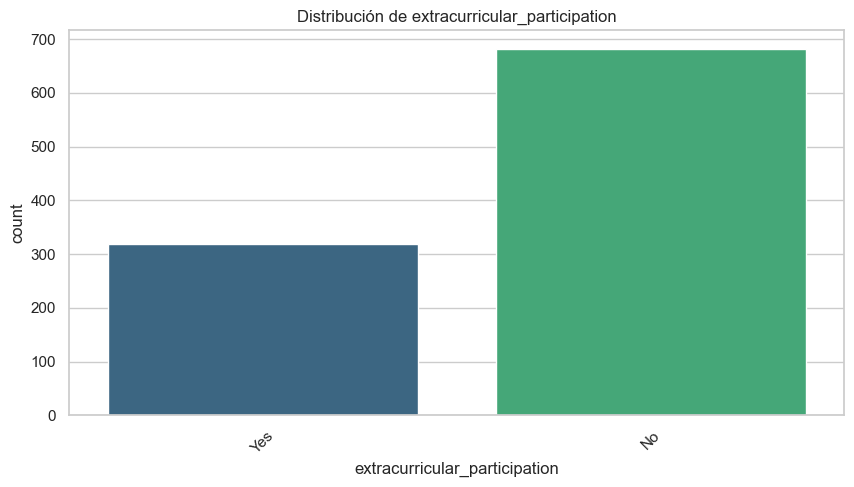

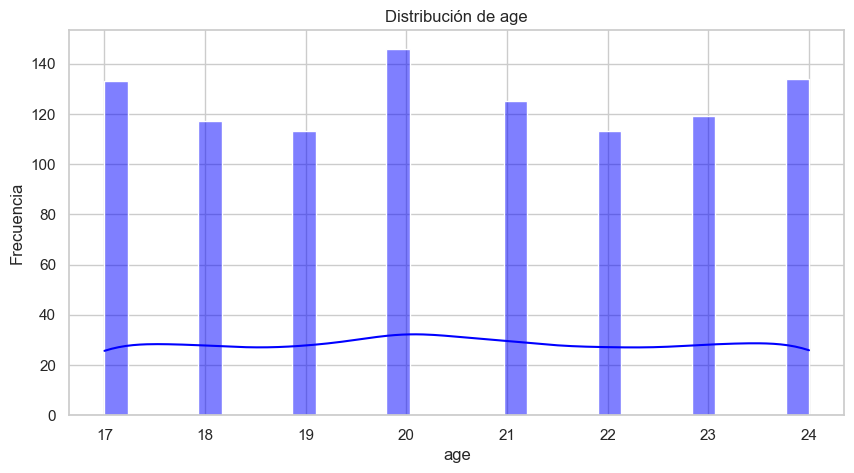

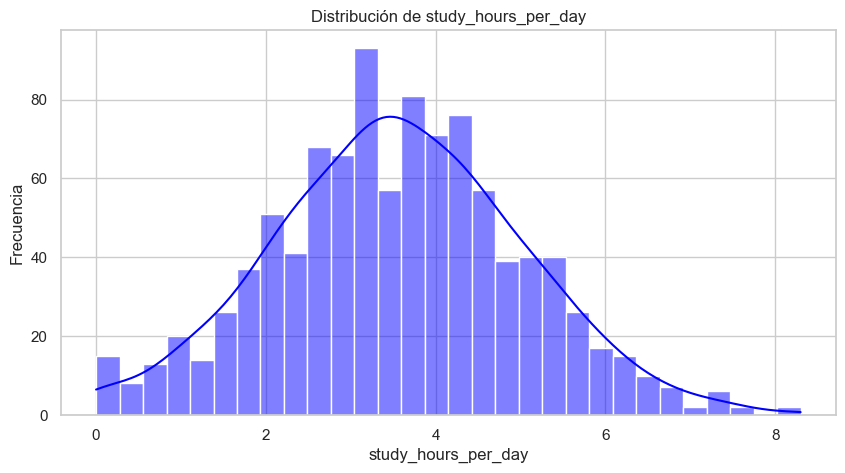

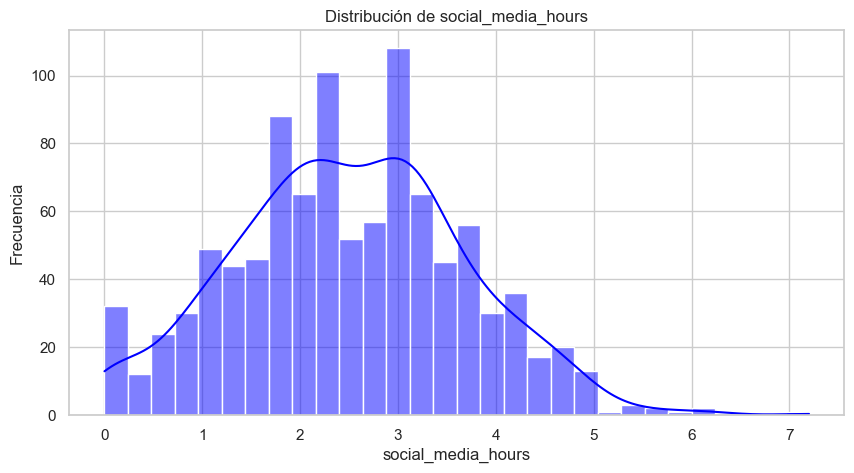

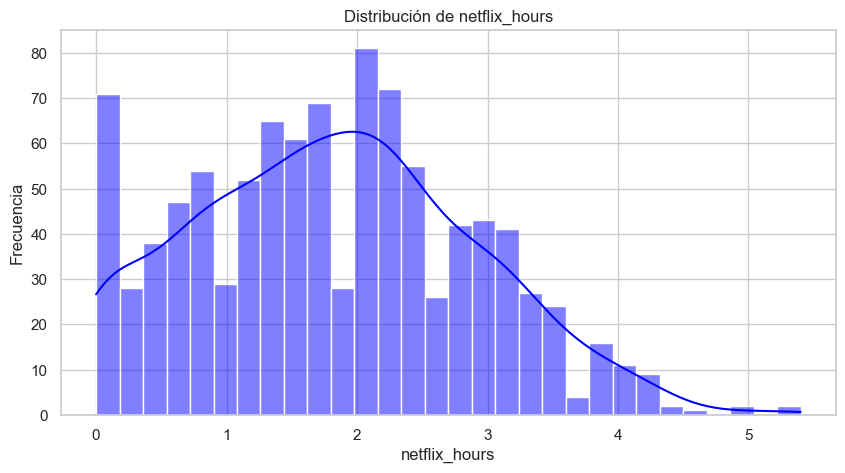

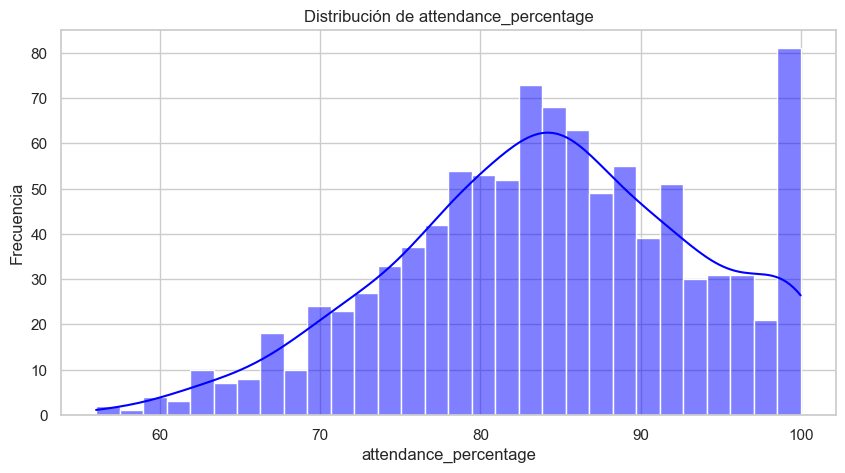

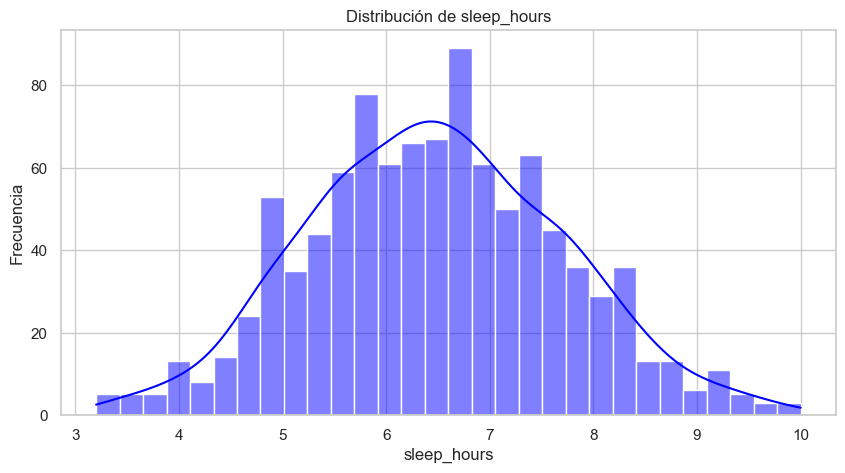

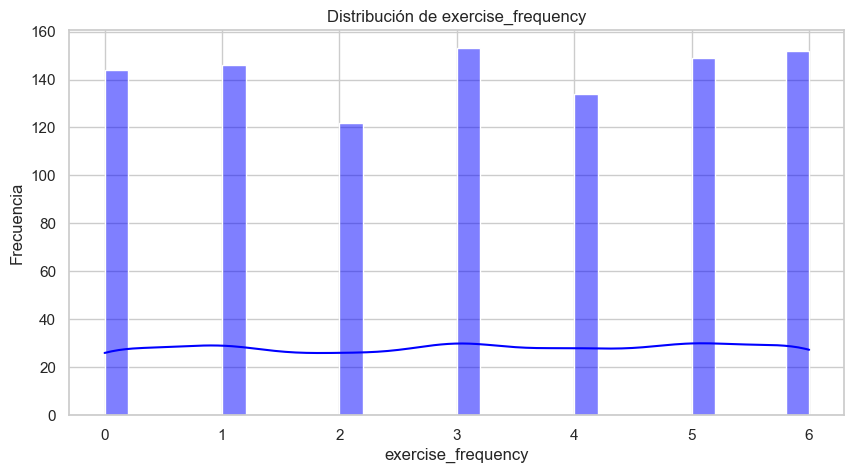

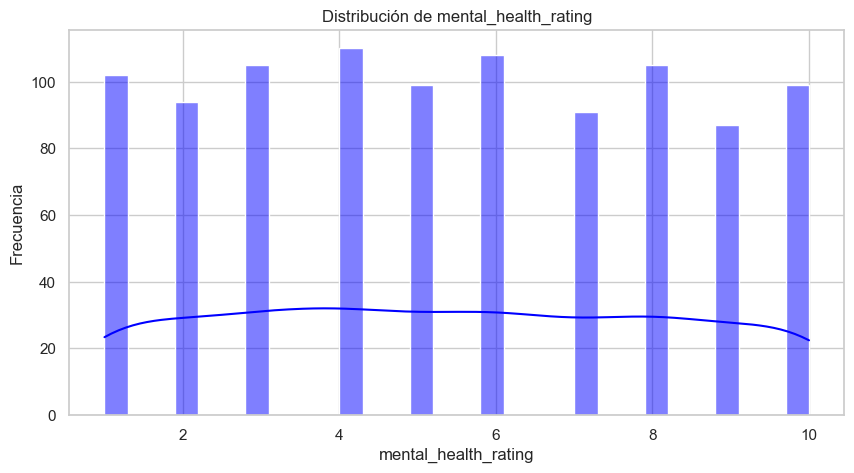

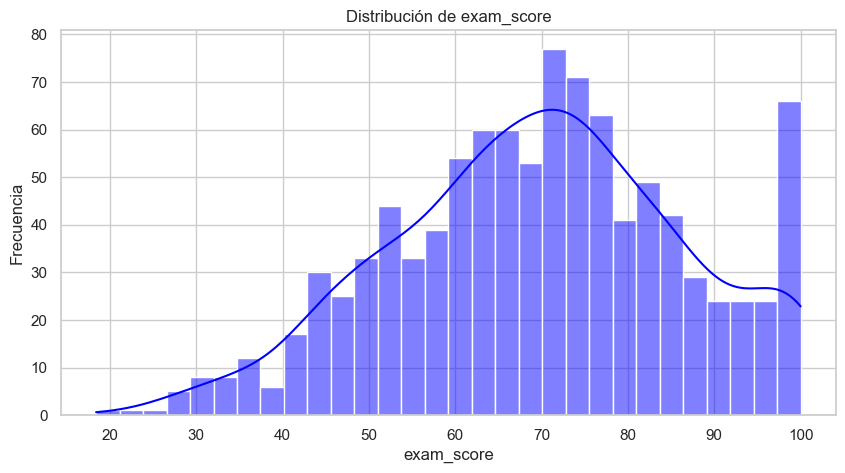

In [14]:
#Gráficas para obtener una visión general de los datos para entenderlos y extraer conclusiones

def plot_categorical_distribution(df, col):
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=col, palette='viridis')
    plt.title(f'Distribución de {col}')
    plt.xticks(rotation=45)
    plt.show()
    
def plot_numerical_distribution(df, col):
    plt.figure(figsize=(10, 5))
    sns.histplot(data=df, x=col, kde=True, color='blue', bins=30)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()


categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=[np.number]).columns

for col in categorical_cols:
    plot_categorical_distribution(df, col)
for col in numerical_cols:
    plot_numerical_distribution(df, col)

### <center> EDA

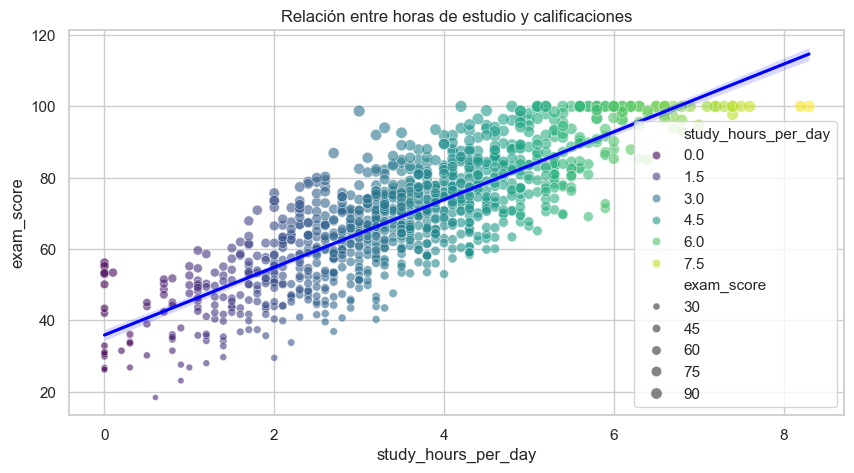

In [15]:
# Relación entre horas de estudio y calificaciones
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='study_hours_per_day', y='exam_score', size='exam_score', hue='study_hours_per_day', alpha=0.6, palette='viridis')

#Ejes y titulos
plt.title('Relación entre horas de estudio y calificaciones')
plt.xlabel('Horas de estudio')
plt.ylabel('Calificaciones en exámenes')

#Linea de regresión
sns.regplot(data=df, x='study_hours_per_day', y='exam_score', scatter=False, color='blue')

#Mostrar la gráfica
plt.show()


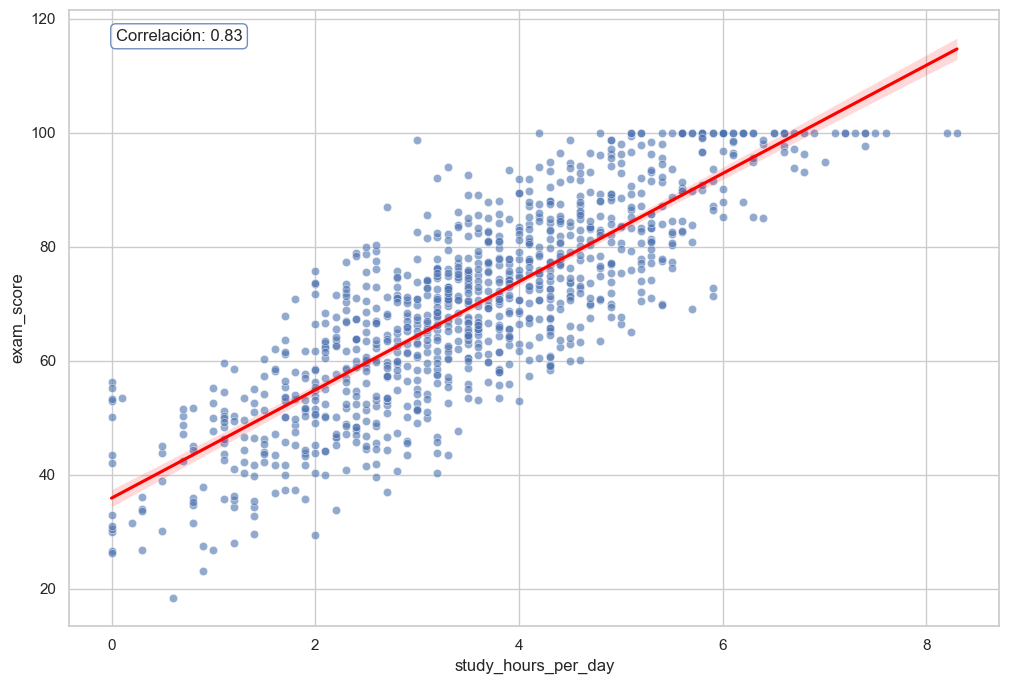

'\nLa función plt.annotate se utiliza para agregar una anotación en el gráfico. \nEl texto de la anotación es una cadena formateada (f\'Correlación: {corr:.2f}\'), \nque incluye el valor de la correlación (corr) redondeado a dos decimales. Este valor \nse calcula previamente con el método .corr() de pandas, que mide la relación lineal \nentre las dos columnas del DataFrame.\n\nEl parámetro xy=(0.05, 0.95) indica la posición de la anotación en coordenadas \nnormalizadas del eje (axes fraction), donde (0, 0) es la esquina inferior izquierda \ny (1, 1) es la esquina superior derecha del gráfico. Esto asegura que la anotación \nse coloque en la parte superior izquierda del gráfico, independientemente de los \nvalores de los datos.\n\nEl argumento bbox define un cuadro alrededor del texto de la anotación. Este cuadro \ntiene un estilo redondeado (boxstyle="round,pad=0.3"), un fondo blanco (fc="white"), \nun borde azul (ec="b"), un grosor de línea de 1 (lw=1) y una transparencia del 80% \n(a

In [16]:
# Relación entre horas de estudio y calificaciones
plt.figure(figsize=(12, 8)) # configuramos el tamaño de la figura
sns.scatterplot(x='study_hours_per_day', y='exam_score', data=df, alpha=0.6) # alpha es la transparencia del punto
plt.xlabel('Horas de Estudio por Día') 
plt.ylabel('Calificación en Examen')


# línea de regresión
sns.regplot(x='study_hours_per_day', y='exam_score', data=df, scatter=False, color='red') # scatter=False para no dibujar los puntos de nuevo

# correlación
corr = df['study_hours_per_day'].corr(df['exam_score']) # calculamos la correlación entre las dos variables
plt.annotate(f'Correlación: {corr:.2f}', xy=(0.05, 0.95), xycoords='axes fraction',  
            bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="b", lw=1, alpha=0.8)) # anotamos la correlación en la figura mediante un cuadro 
plt.show() 
'''
La función plt.annotate se utiliza para agregar una anotación en el gráfico. 
El texto de la anotación es una cadena formateada (f'Correlación: {corr:.2f}'), 
que incluye el valor de la correlación (corr) redondeado a dos decimales. Este valor 
se calcula previamente con el método .corr() de pandas, que mide la relación lineal 
entre las dos columnas del DataFrame.

El parámetro xy=(0.05, 0.95) indica la posición de la anotación en coordenadas 
normalizadas del eje (axes fraction), donde (0, 0) es la esquina inferior izquierda 
y (1, 1) es la esquina superior derecha del gráfico. Esto asegura que la anotación 
se coloque en la parte superior izquierda del gráfico, independientemente de los 
valores de los datos.

El argumento bbox define un cuadro alrededor del texto de la anotación. Este cuadro 
tiene un estilo redondeado (boxstyle="round,pad=0.3"), un fondo blanco (fc="white"), 
un borde azul (ec="b"), un grosor de línea de 1 (lw=1) y una transparencia del 80% 
(alpha=0.8). Esto mejora la legibilidad del texto en el gráfico.
'''

#### <b>Conclusiones:</b> ambas gráficas muestran de forma evidente como la relación entre las horas de estudio y las calificaciones obtenidas en los exámenes es directamente proporcional. Cuantas más horas estudia el alumno, mejores notas saca. La línea de dispersión, además, pone en evidencia esa tendencia creciente.

In [17]:
#Relación calificaciones y uso de redes sociales

# Crear categorías de horas en redes sociales
bins = [0, 2, 4, 6, 8]
labels = ['0-2', '2-4', '4-6', '6-8']
df['social_media_category'] = pd.cut(df['social_media_hours'], bins=bins, labels=labels, right=False)

# Crear el gráfico de caja
fig = px.box(
    df,
    x='social_media_category',
    y='exam_score',
    color='social_media_category',
    title='Distribución de calificaciones por categoría de horas en redes sociales',
    labels={'social_media_category': 'Horas en redes sociales', 'exam_score': 'Calificaciones en exámenes'}
)

fig.show()

#### <b>Conclusiones:</b> en cuanto a las horas de uso de redes sociales, podemos observar que en los rangos de menor consumo sí existe una relación negativa, es decir, los alumnos que consumen menos de dos horas al día en redes sociales tienen mejores cualificaciones que los que consumen hasta 4 horas al día y con mayor evidencia, los que consumen entre 4 y 6 horas. Sin embargo, a partir de las 6 horas de consumo, esta tendencia se rompe y las cualificaciones mayoritarias de los alumnos que consumen entre 6-8 horas de redes sociales vuelve a aumentar. En este último caso vemos también como la nota máxima decrece y la mínima diminuye, esto puede deberse a que este último grupo de alumnos que consume entre 6 y 8 horas de redes sociales al día es mucho menor que el resto, ya que es un consumo excesivamente elevado, poco habitual, que no es representativo. 

In [18]:
# Relación entre horas de Netflix y calificaciones
fig = px.scatter(
    df, 
    x="netflix_hours", 
    y="exam_score", 
    title="Relación entre horas de Netflix y calificaciones",
    color="exam_score", 
    size="netflix_hours",
    labels={'netflix_hours': 'Horas en Netflix', 'exam_score': 'Calificaciones en exámenes'},
    log_x=True, 
    size_max=55,
    color_continuous_scale=px.colors.sequential.Viridis
)

fig.show()

#### <b> Conclusiones: </b> en cuanto a las horas de consumo de netflix y las notas, no vemos una relación directa clara. Si observamos la gráfica, podemos afirmar que la mayoría de alumnos consume entre 1 y 5 horas de netflix al día. Sin embargo, la variación de color del gráfico representada por las calificaciones de los exámenes es equitativa en todo el eje x, independientemente de las horas de consumo de la plataforma de streaming. 

In [19]:
# Relación horas de sueño y calificaciones con degradado en función de exam_score
fig = px.bar(
    df, 
    x="exam_score", 
    y="sleep_hours", 
    orientation='h', 
    title="Relación entre horas de sueño y calificaciones",
    labels={'exam_score': 'Calificaciones éxamenes', 'sleep_hours': 'Horas de sueño'},
    color="exam_score", 
    color_continuous_scale=px.colors.sequential.Blues)
fig.show()

#### <b> Conclusiones: </b> en este gráfico relacionamos las horas de sueño con las notas y podemos mencionar 3 aspectos: la mayoría de alumnos tiene notas de entre 6 y 8 puntos en los exámenes, lo más habitual es que los alumnos duerman entre 7 y 9 horas y la relacion entre ambas variables es desigual ya que vemos como el rango de colores, que representa la nota en los examenes se reparte de forma aleatoria en toda la gráfica sin seguir un patrón claro. 

In [20]:
# Compara calificaciones por género
fig = px.pie(df, values='exam_score', names='gender', title='Calificaciones por género')
fig.show()

#### <b> Conclusiones: </b> el género tampoco es significativo a la hora de comparar las calificaciones en los examenes. De hecho vemos claramente en esta gráfica que se reparte prácticamente a partes iguales. 

In [21]:
# Compara calificaciones por trabajo de medio tiempo

fig = px.violin(
    df,
    x='part_time_job',
    y='exam_score',
    color='part_time_job',
    title='Distribución de calificaciones por trabajo de medio tiempo',
    labels={'part_time_job': 'Trabajo de medio tiempo', 'exam_score': 'Calificaciones en exámenes'}
)

fig.show()


#### <b> Conclusiones: </b> la existencia o no de un trabajo a media jornada tampoco indice en las notas. Sí observamos que aquellos alumnos que sí tienen un trabajo a media jornada tienen notas mínimas más altas y también notas máximas más altas. Esto puede deberse a que tengan un sentido de la responsabilidad más alto y una mayor conciencia del esfuerzo, ya que no tienen notas por debajo del 2, cosa que sí pasa en aquellos alumnos que no tienen trabajo. Sin embargo, en el groso de alumnos, las media de calificaciones no se ve afectada por esta variable. 

In [22]:
# Compara calificaciones por calidad de dieta
fig = px.histogram(
    df,
    x="exam_score",
    color="diet_quality",
    marginal="rug",  # Can be "rug", "box", "violin"
    hover_data=df.columns,
    title="Distribución de Calificaciones por Calidad de la Dieta",
    labels={'exam_score': 'Calificación en el Examen', 'diet_quality': 'Calidad de la Dieta'}
)
fig.show()

#### <b> Conclusiones: </b> de nuevo vemos un efecto mínimo de la dieta en las calificaciones. La tendencia de la gráfica es exactamente la misma en alumnos con una dieta pobre, normal o sana. Aún así sí podemos observat que la mayoría de alumnos tienen una dieta pobre, poco healthy. 

In [23]:
# Compara calificaciones por participación extracurricular
fig = px.box(
    df,
    x='extracurricular_participation',
    y='exam_score',
    color='extracurricular_participation',
    title='Distribución de calificaciones por participación extracurricular',
    labels={'extracurricular_participation': 'Participación extracurricular', 'exam_score': 'Calificaciones en exámenes'}
)

fig.show()

#### <b> Conclusiones: </b> la participación extracurricular tampoco afecta a las calificaciones. De hecho las dos cajas son prácticamente iguales.

<Axes: >

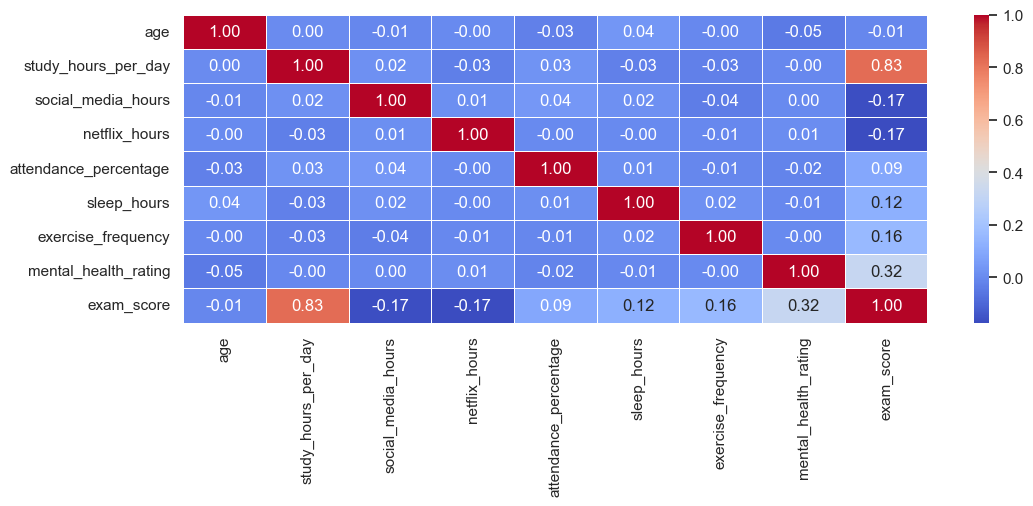

In [24]:
var_num = df.select_dtypes(include=[np.number]).columns.tolist()
sns.heatmap(df[var_num].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

#### <b> Conclusiones: </b> teniendo en cuenta las conclusiones qu ehemos extraído de todas las gráficas anteriores, vemos que la única variable que indice significativamente en las calificaciones son las horas de estudio. Por ello, hemos querido cerciorarnos realizando esta tabla de correlación entre variables. En ella se observa claramente que la correlación entre calificaciones y horas de estudio es muy alta, un 0,83. Destaca también, sin ser demasiado evidente, la salud mental con una correlación del 0,32, lo que es completamente lógico ya que si el alumno tiene problemas emocionales o de gestión emocional su capacidad de concentración lo habitual es que disminuya. La correlación del resto de variables no es representativa.

### Análisis multivariable

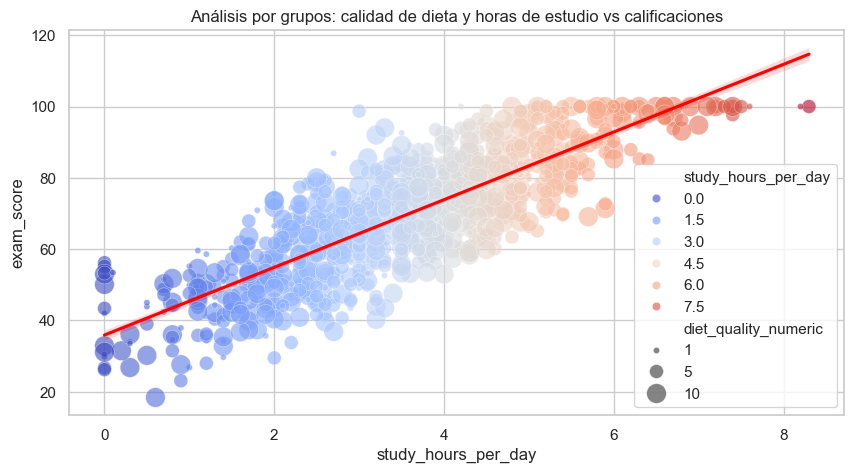

In [25]:
#Análisis por grupos: calidad de dieta y horas de estudio vs calificaciones

if df['diet_quality'].dtype == 'object':
    diet_quality_mapping = {'Poor': 1, 'Fair': 5, 'Good': 10}  # Aumentamos la diferencia entre los tamaños
    df['diet_quality_numeric'] = df['diet_quality'].map(diet_quality_mapping)  # Convertir variable en numérica

# Plot
plt.figure(figsize=(10, 5))
sns.scatterplot(
    data=df, 
    x='study_hours_per_day', 
    y='exam_score', 
    size='diet_quality_numeric',
    hue='study_hours_per_day', 
    alpha=0.6, 
    palette='coolwarm',
    sizes=(20, 200)  # Ajustamos el rango de tamaños para mayor visibilidad
)

# Ejes y títulos
plt.title('Análisis por grupos: calidad de dieta y horas de estudio vs calificaciones')
plt.xlabel('Horas de estudio')
plt.ylabel('Calificaciones en exámenes')

# Línea de regresión
sns.regplot(
    data=df, 
    x='study_hours_per_day',
    y='exam_score', 
    scatter=False, 
    color='red'
)

# Mostrar la gráfica
plt.show()


#### <b> Conclusiones: </b> en una segunda fase de análisis hemos decidido realizar algunas comparaciones multivariables. En este caso hemos querido interrelacional las calificaciones con las horas de estudio y la dieta de los alumnos.La tendencia es la misma, como vemos en el gráfico las horas de estudio se relacionan directametne con unas mayores calificaciones, incluso en la línea de dispersión vemos una tendencia claramente creciente. Por otro lado, la calidad de la dieta, representada en el tamaño de las burbujas, no muestra ninguna característica destacable, simplemente que la mayoría de bolas tienen el mismo tamaño, que como ya hemos dicho en el gráfico correspondiente, se identifica con una dieta poco saludable.

In [26]:
#Análisis por grupos: participación extracurricular y horas de estudio vs calificaciones
# Ajustar la escala del eje x para que vaya de 0 al máximo de horas de estudio
fig = px.bar(
    df, 
    y="extracurricular_participation", 
    x="study_hours_per_day", 
    color="exam_score", 
    orientation="h",
    color_continuous_scale='Bluered_r', 
    hover_name="exam_score"
)

# Configurar el rango del eje x
fig.update_layout(xaxis=dict(range=[0, df['study_hours_per_day'].max()]))

fig.show()

#### <b> Conclusiones: </b>  si relacionamos las calificaciones con las horas de estudio y la participación en extracurriculares sí vemos datos significativos. En primer lugar, que a partir de las 6-7 horas de estudio, las calificaciones no mejoran, al contrario. Esto puede deberse a que los alumnos que necesitan tantas hora sde estudio tendrían mayor dificultad para memorizar o entender el temario, incluso para concentrarse. Por otro lado, en el caso de los alumnos que sí realizan extracurriculares, por debajo de la hora de estudio, tiene bajas calificaciones pero los que no realizan actividades extraescolares, esto puede deberse a la mayor falta de tiempo de los que sí realizan actividades extraescolares y al mayor número de responsabilidades que hacen que repartan su atención. 

In [28]:
#Análisis por grupos: horas de sueño, salud mental y calificaciones

fig = px.density_contour(
    df, 
    x="mental_health_rating", 
    y="sleep_hours", 
    color="exam_score", 
    marginal_x="histogram", 
    marginal_y="histogram", 
    title="Relación entre salud mental, horas de sueño y calificaciones",
    labels={'mental_health_rating': 'Salud Mental', 'sleep_hours': 'Horas de Sueño', 'exam_score': 'Calificaciones'}
)
fig.show()

#### <b> Conclusiones: </b>  en esta última grárica que relaciona las horas de sueño, la salud mental y las calificaciones de los examenes podemos ver que los alumnos que sacan las mejores notas tienen una buena salud mental, lo mismo ocurre con las horas de sueño. En el resto de la gráfica, las calificaciones se reparten de forma aleatoria, por lo que la incidencia de estas variables no es significativa. 